In [18]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


## Задача про использование библиотеки sklearn для построения KNN классификатора

In [19]:
random_seed = 4238

np.random.seed(random_seed)
n_splits = 3

from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)

In [9]:
cv_scores = []
clf = KNeighborsClassifier()
score= cross_val_score(clf,X,y,cv = n_splits)
for k in range(1, 51):
    clf = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(clf,X,y,cv = n_splits)
    cv_scores.append(np.mean(score))
    pass
print(np.argmax(cv_scores))

10


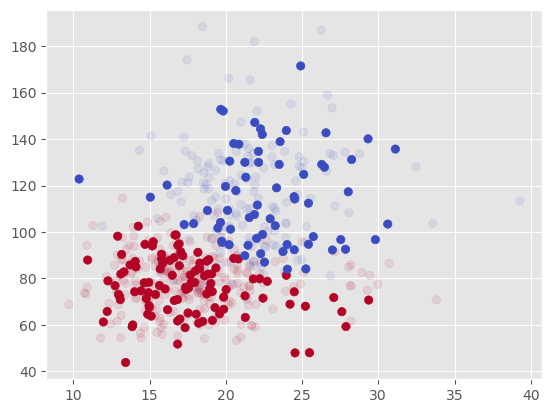

In [46]:
plt.style.use('ggplot')
plt.scatter(x_train[:,1],x_train[:,2], c = y_train,cmap = 'coolwarm',alpha = 0.1)
plt.scatter(x_test[:,1],x_test[:,2],c = clf.predict(x_test[:,1:3]),cmap = 'coolwarm')

## Задача про написание своего KNN классификатора

In [27]:
import numpy as np
def dist(a: np.array ,b: np.array, p: int) -> float:
    d = a - b
    r = np.linalg.norm(d, ord=p)
    return r
class KNN_classifier:
    def __init__(self, n_neighbors: int, **kwargs):
        self.K = n_neighbors
    def fit(self, x: np.array, y: np.array):
        global data_x, data_y, data
        # TODO: напишите метод .fit() класса KNN_classifier
        # Эта функция принимает на вход два массива:
        # - x (набор признаков, массив размерности n x m, n - число объектов, m - размерность признакового описания)
        # - y (метки для обучения, одномерный массив размерности n)
        # Эта функция ничего не возвращает, она должна настроить внутренние параметры модели для дальнейшего использования
        # Подумайте, в чем заключается процесс обучения именно этого алгоритма?
        # Что этот алгоритм делает в тот момент, когда он получил обучающую выборку?
        # Реализуйте эту логику в коде
        num_class = np.unique(y)
        data_x = x
        data_y = y
        data = np.concatenate(x,y)
        pass

    def predict(self, x: np.array):
        predictions = []
        distance
        for spot in range(x.shape[0]): # Делаем цикл для каждой точки из заданного списка х
            distance = []
            for vec in range(data_x.shape[0]):
                distance.append(dist(x[spot],data_x[vec],2)) #вычисляем дистанцию от каждой точки до заданной
            points = np.hstack([np.array(distance).reshape(-1,1),self.data_y])
            top_K = points[points[:,1].argsort()][0:self.K]
            unique, counts = np.unique(top_K, return_counts=True)# получаем уникальные значения и их количество
            counts = np.asarray((unique, counts)).T 
            predictions.append(counts[counts[:,1].argmax()]) # добавляем в predictions предсказание для первой точки
        # TODO: напишите метод .predict(x) класса KNN_classifier
        # Этот метод принимает на вход один массив x. Массив x - это двумерный массив объектов, для которых требуется получить предсказание
        # На выходе этой функции мы хотим получить одномерный массив predictions, размерности x.shape[0] (то есть для каждогго объекта массива x мы сделали своё предсказание)
        # Вспомните, как алгоритм KNN делает предсказание?
        # Реализуйте эту логику в коде
        predictions = np.array(predictions)
        return predictions

Ниже можно запустить ячейки для проверки классификатора.

In [ ]:
X = [[ 0.56510722,  0.68599596, -0.92388505, -0.29546048, -0.12437532],
       [-0.79617537,  0.98406791,  1.19542652, -0.05626863, -0.69868076],
       [ 0.9629688 , -1.00423925, -0.53842833, -0.23744358,  0.83226685],
       [ 0.24671269, -0.41624448,  0.81679337,  1.59227446,  0.16192583],
       [-0.36972363,  0.17425997,  1.33668078,  1.16687907,  0.31709134],
       [-1.30482844, -0.05354323, -0.88862186, -1.121785  , -0.78442809],
       [-0.53975018,  0.90074877, -1.09317408,  1.52989481, -0.43375015],
       [-0.64709803, -0.09775791,  1.3506503 , -1.46957788,  1.63325543],
       [-0.73858464, -0.60678229,  0.31420272, -0.43100129, -0.37665876],
       [-0.29208809, -0.68795722,  0.06586655,  0.9583851 ,  1.70640775]]

In [ ]:
y = [1, 0, 0, 1, 0, 1, 0, 1, 0, 1]

In [ ]:
knn = KNN_classifier(n_neighbors=3)
knn.fit(X, y)

In [ ]:
knn.predict(x_test)